In [1]:
import pypsa, numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

This scenario looks at 1 year of data for the Caribbean nation of Antigua. 

In [2]:
csv_folder_name =  "Antigua_data"
network = pypsa.Network(csv_folder_name)

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network Antigua_data has buses, generators, links, loads, stores


In [3]:
#specify that we consider all snapshots
network.lopf(network.snapshots, pyomo=True)

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using glpk
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 43085601.2651389
  Upper bound: 43085601.2651389
  Number of objectives: 1
  Number of constraints: 219001
  Number of variables: 131405
  Number of nonzeros: 411221
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 72.45582389831543
# ----------------------------------------------------------
#   Solution Information
# --

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

In [4]:
csv_folder_name = "Export_data"
network.export_to_csv_folder(csv_folder_name)

INFO:pypsa.io:Exported network Export_data has buses, loads, generators, stores, links


<AxesSubplot:xlabel='snapshot'>

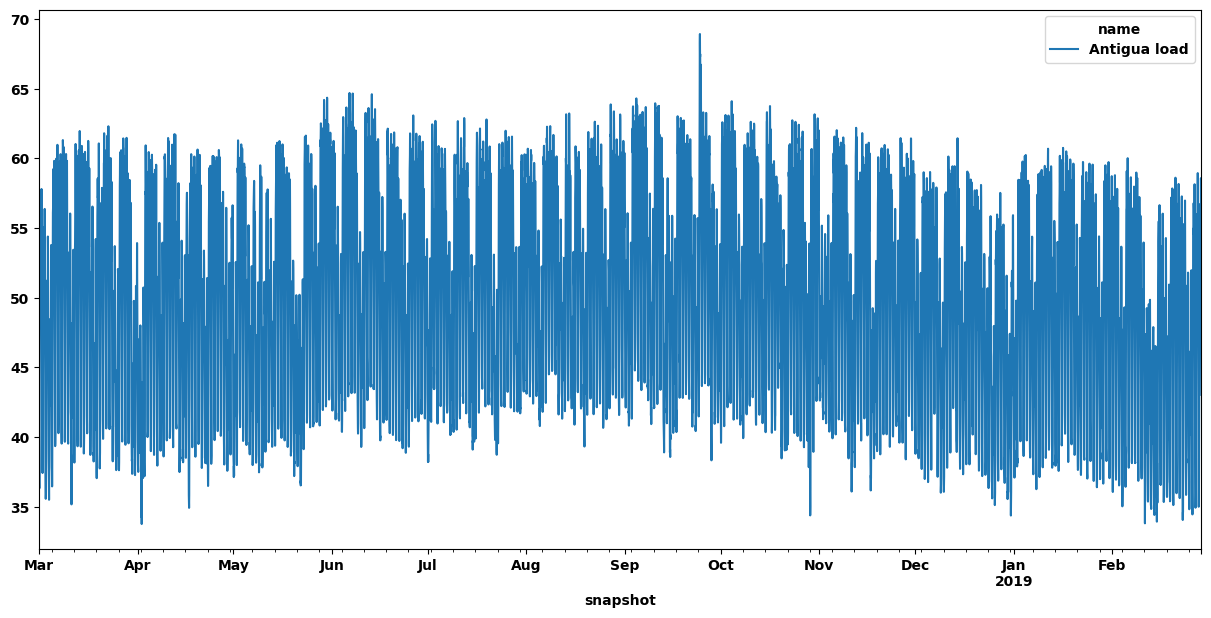

In [5]:
#print the load active power (P) consumption
network.loads_t.p.plot(figsize = (15,7))

name
Antigua_fuel_oil      0.000000
Antigua_solar_pv    371.567137
Antigua_wind         25.000000
Antigua_CSP          33.479699
Name: p_nom_opt, dtype: float64


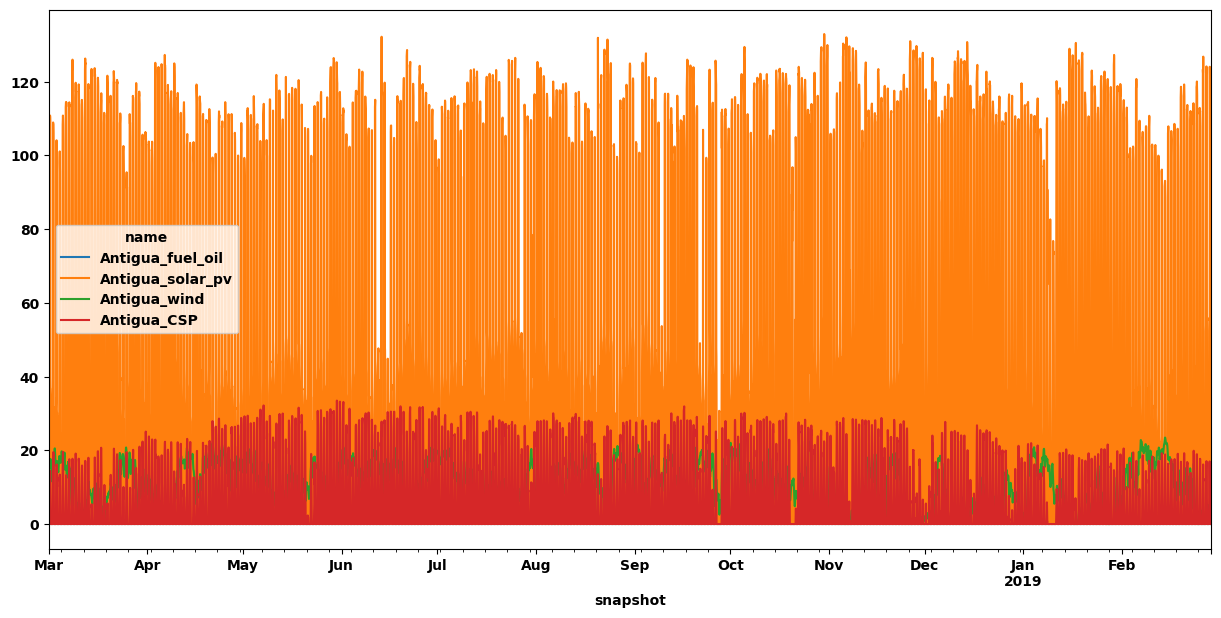

In [6]:
#print the generator active power (P) dispatch
network.generators_t.p.plot(figsize = (15,7))
print(network.generators.p_nom_opt)

name
Antigua Battery      537.893039
CSP_Thermal         1680.000000
Hydrogen_storage       0.000000
Name: e_nom_opt, dtype: float64


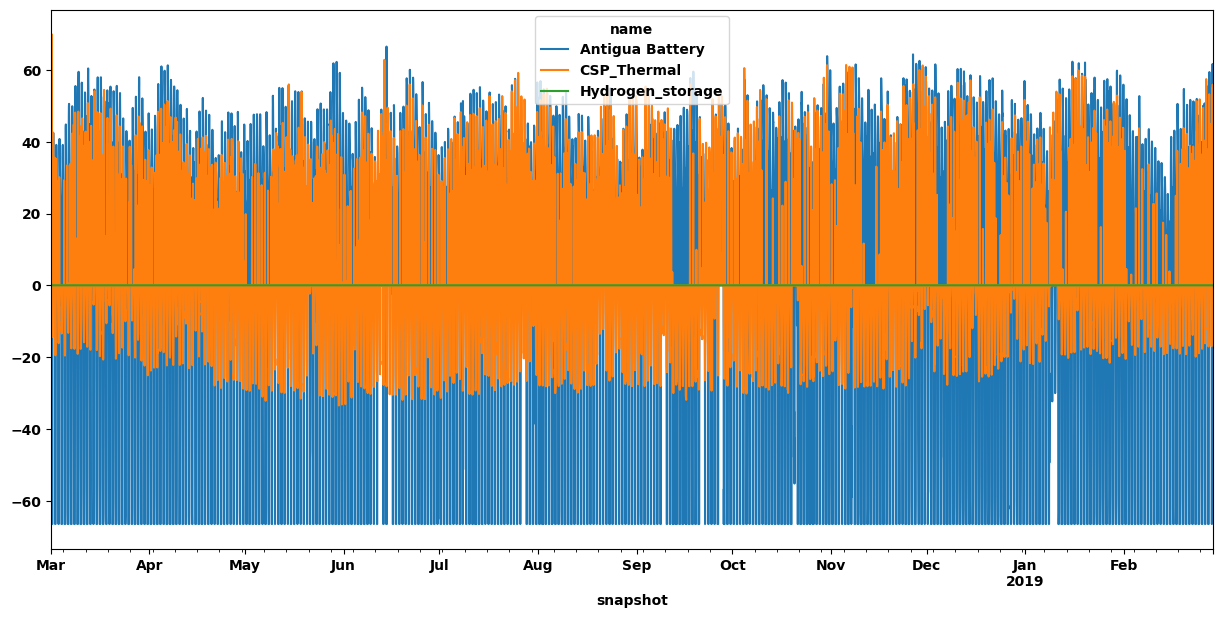

In [7]:
#print storage units
network.stores_t.p.plot(figsize = (15,7))
print(network.stores.e_nom_opt)

<AxesSubplot:xlabel='snapshot'>

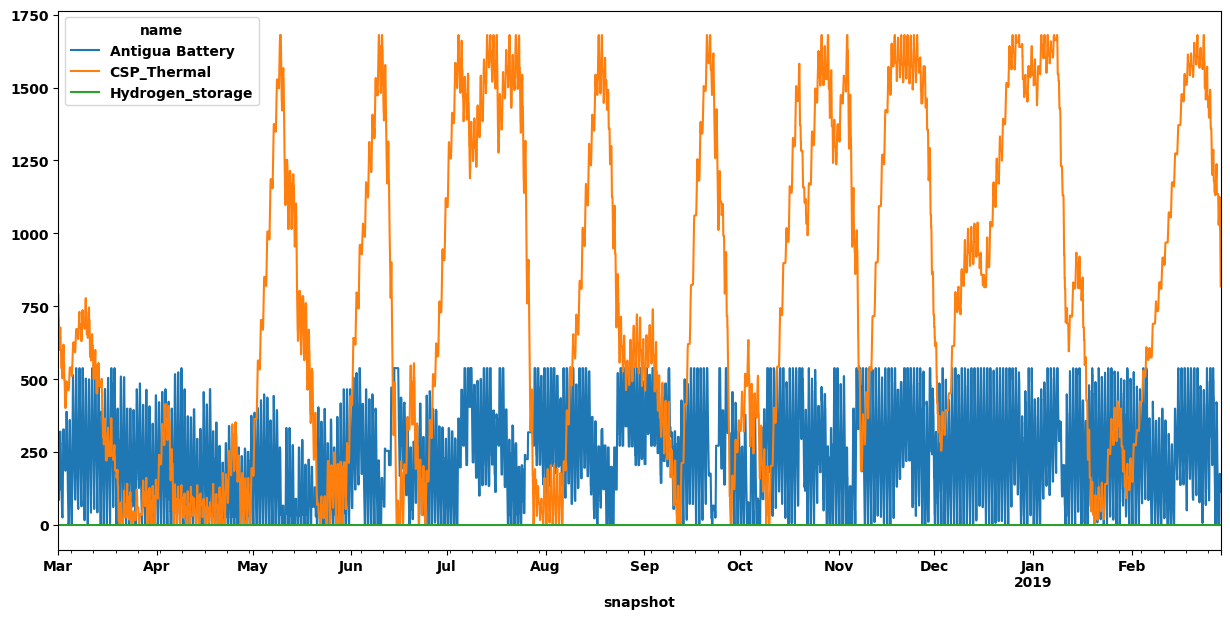

In [8]:
#print storage units state of charge
network.stores_t.e.plot(figsize = (15,7))


<AxesSubplot:xlabel='snapshot'>

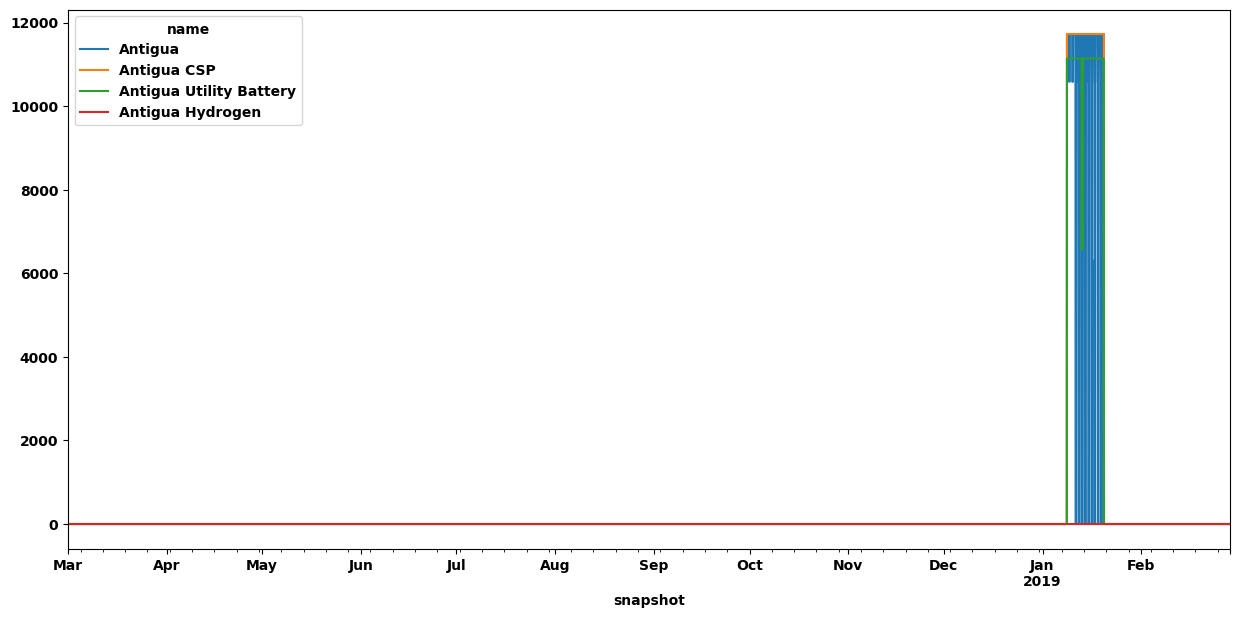

In [9]:
#print the clearing price 
network.buses_t.marginal_price.plot(figsize = (15,7))

In [10]:
#link shadow prices
network.links_t.mu_lower

name,CSP Link,Charge,Discharge,Electrolyzer,Fuel Cell
snapshot,,,,,
2018-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2018-03-01 01:00:00,0.0,0.0,0.0,0.0,0.0
2018-03-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2018-03-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2018-03-01 04:00:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-02-28 19:00:00,0.0,0.0,0.0,0.0,0.0
2019-02-28 20:00:00,0.0,0.0,0.0,0.0,0.0
2019-02-28 21:00:00,0.0,0.0,0.0,0.0,0.0


name
CSP Link        70.0
Charge          70.0
Discharge       70.0
Electrolyzer     0.0
Fuel Cell        0.0
Name: p_nom_opt, dtype: float64


name,CSP Link,Charge,Discharge,Electrolyzer,Fuel Cell
snapshot,,,,,
2018-03-01 00:00:00,26.274023,0.0,0.000000,0.0,0.0
2018-03-01 01:00:00,23.415187,0.0,0.000000,0.0,0.0
2018-03-01 02:00:00,22.785395,0.0,0.000000,0.0,0.0
2018-03-01 03:00:00,21.697707,0.0,0.000000,0.0,0.0
2018-03-01 04:00:00,22.417365,0.0,0.000000,0.0,0.0
...,...,...,...,...,...
2019-02-28 19:00:00,0.000000,0.0,61.647421,0.0,0.0
2019-02-28 20:00:00,55.913117,0.0,0.000000,0.0,0.0
2019-02-28 21:00:00,50.754467,0.0,0.000000,0.0,0.0


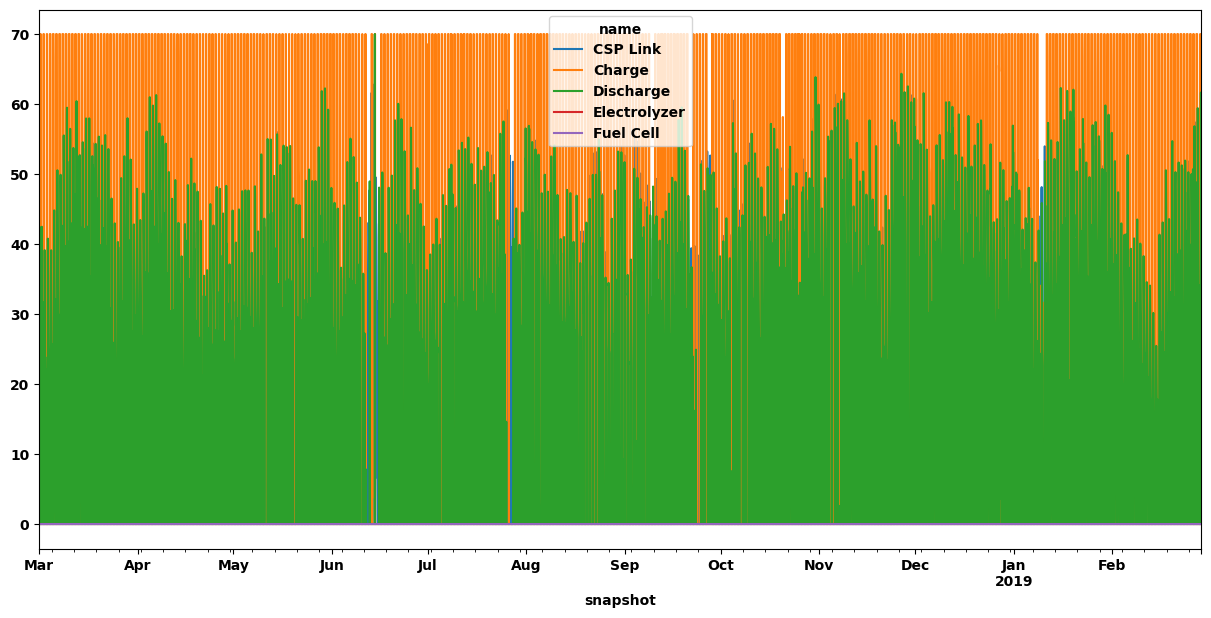

In [11]:
#print the transmission between CSP and main bus
network.links_t.p0.plot(figsize = (15,7))
print(network.links.p_nom_opt)
network.links_t.p0

In [12]:
print("Energy in Storage")
network.stores_t.e

Energy in Storage


name,Antigua Battery,CSP_Thermal,Hydrogen_storage
snapshot,,,
2018-03-01 00:00:00,113.762814,791.638627,0.0
2018-03-01 01:00:00,113.762814,768.223440,0.0
2018-03-01 02:00:00,113.762814,745.438045,0.0
2018-03-01 03:00:00,113.762814,723.740337,0.0
2018-03-01 04:00:00,113.762814,701.322972,0.0
...,...,...,...
2019-02-28 19:00:00,113.762814,1015.530445,0.0
2019-02-28 20:00:00,113.762814,959.617327,0.0
2019-02-28 21:00:00,113.762814,908.862860,0.0


In [13]:
print("LCOE ($/MWh)")
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()+(network.stores.e_nom_opt*network.stores.capital_cost).sum()+(network.links.p_nom_opt*network.links.capital_cost).sum()).sum()/(network.loads_t.p_set.sum()).sum()

LCOE ($/MWh)


152.3428759060269

In [14]:
print("Total Capital Cost ($)")
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()+(network.stores.e_nom_opt*network.stores.capital_cost).sum()+(network.links.p_nom_opt*network.links.capital_cost).sum()).sum()

Total Capital Cost ($)


66587101.26513891

In [15]:
print("Generators Cost ($)")
(network.generators.p_nom_opt*network.generators.capital_cost).sum()

Generators Cost ($)


50934980.55632073

In [16]:
print("Storage Cost ($)")
(network.stores.e_nom_opt*network.stores.capital_cost).sum()

Storage Cost ($)


15652120.708818179

Diesel Energy Generation


0.0

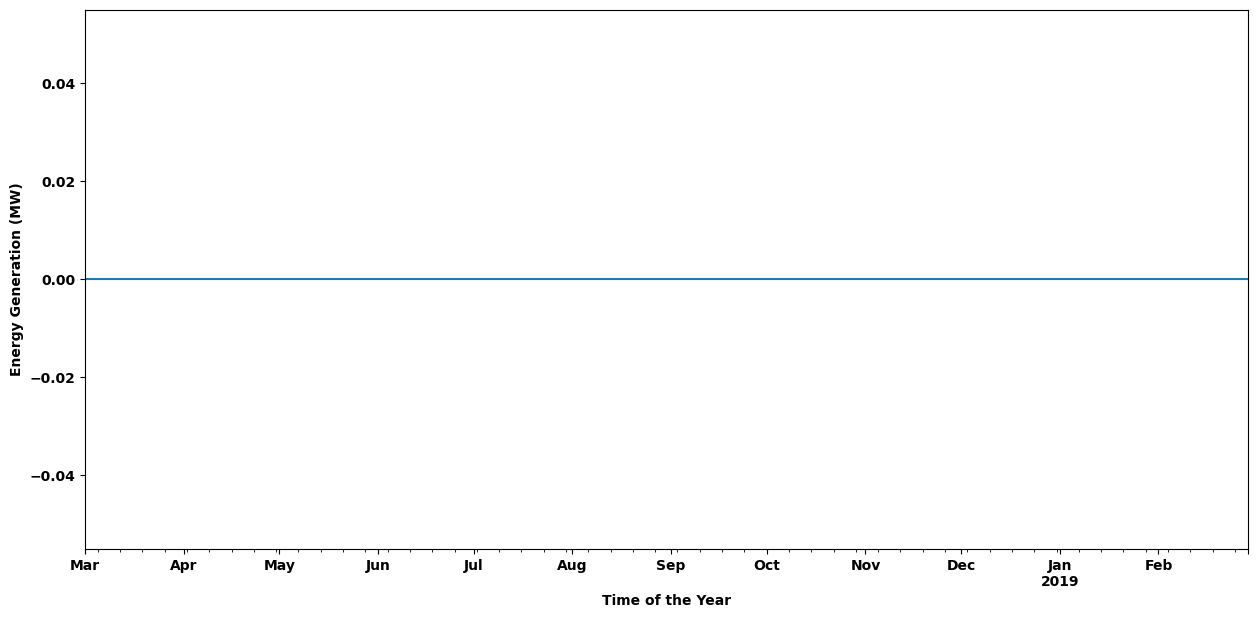

In [17]:
print("Diesel Energy Generation")
network.generators_t.p.Antigua_fuel_oil.plot(figsize = (15,7))
plt.xlabel('Time of the Year')
plt.ylabel('Energy Generation (MW)')
(network.generators_t.p.Antigua_fuel_oil).sum()

In [18]:
print("Solar PV Generation")
(network.generators_t.p.Antigua_solar_pv).sum()

Solar PV Generation


305212.8542777436

In [19]:
print("Wind Generation")
(network.generators_t.p.Antigua_wind).sum()

Wind Generation


93507.3154257432

In [20]:
print("CSP Generation")
(network.generators_t.p.Antigua_CSP).sum()

CSP Generation


52471.41006046343

In [21]:
print("Renewable Penetration")
((1-(network.generators_t.p.Antigua_fuel_oil.sum())/(network.loads_t.p_set.sum()))*100)

Renewable Penetration


Load
Antigua load    100.0
dtype: float64